In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [2]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [21]:
#For filling the missing values
customers.fillna('Unknown', inplace=True)
products.fillna('Unknown', inplace=True)

# Formatting the date columns into DateTime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


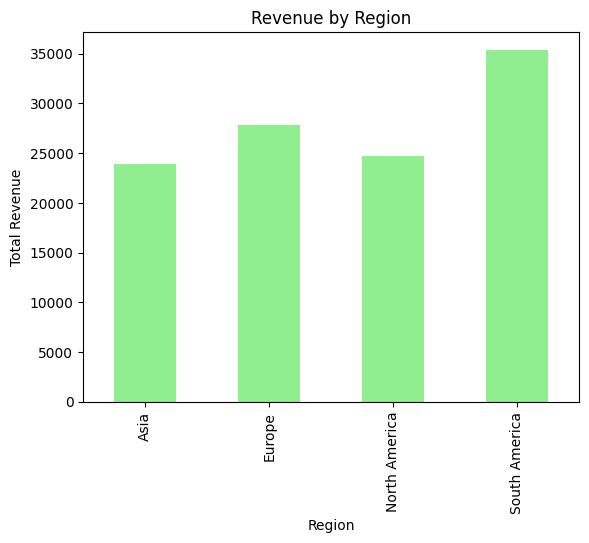

Region
Asia             23958
Europe           27846
North America    24685
South America    35407
Name: Revenue, dtype: int32

In [19]:
np.random.seed(42)
df['Revenue'] = np.random.randint(100, 1000, size=len(df))

# Grouping by Region and sum the revenue
region_revenue = df.groupby('Region')['Revenue'].sum()

region_revenue.plot(kind='bar', color='lightgreen')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

region_revenue


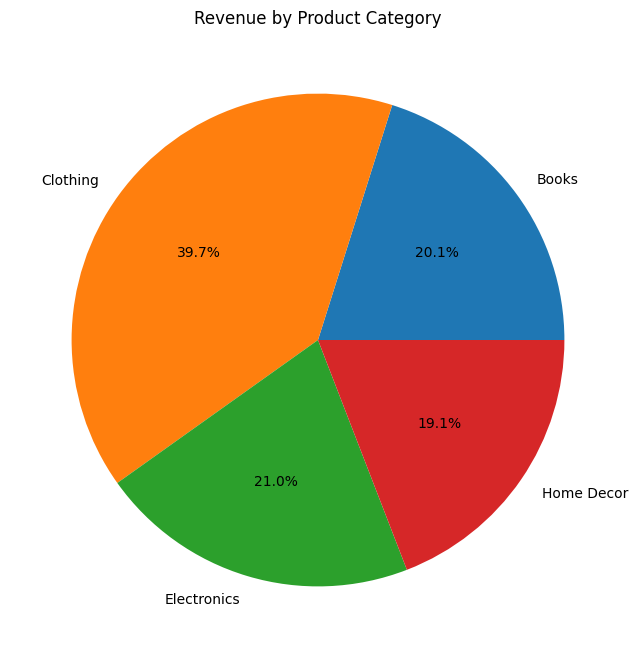

ProductCategory
Books          10694.640996
Clothing       21103.197865
Electronics    11168.175203
Home Decor     10160.451182
Name: CategoryRevenue, dtype: float64

In [20]:
# Categorizing the product data
categories = ['Books', 'Electronics', 'Home Decor', 'Clothing']
df['ProductCategory'] = np.random.choice(categories, size=len(df))

# Simulate the revenue split across product categories
df['CategoryRevenue'] = df['Revenue'] * np.random.rand(len(df))

# Grouping it by Product Category and sum the revenue
category_revenue = df.groupby('ProductCategory')['CategoryRevenue'].sum()

# Ploting pie chart for revenue by product category
category_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Revenue by Product Category')
plt.ylabel('')
plt.show()

# Insight derived from the data
category_revenue


In [23]:
import matplotlib.pyplot as plt
plt.savefig('Product Revenue.png')

<Figure size 640x480 with 0 Axes>

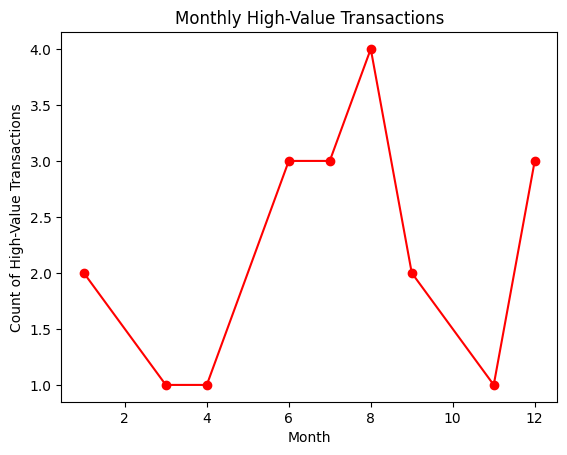

Month
1     2
3     1
4     1
6     3
7     3
8     4
9     2
11    1
12    3
dtype: int64

In [10]:
# Simulate transaction dates
df['TransactionDate'] = pd.to_datetime(np.random.choice(pd.date_range('2023-01-01', '2023-12-31', freq='D'), len(df)))

# Simulate high-value transactions topping the 10% of revenue
high_value_threshold = df['Revenue'].quantile(0.9)
df['HighValue'] = df['Revenue'] > high_value_threshold

# Filtering high-value transactions and count by month
df['Month'] = df['TransactionDate'].dt.month
high_value_months = df[df['HighValue']].groupby('Month').size()

# Ploting line chart for monthly high-value transactions
high_value_months.plot(kind='line', marker='o', color='red')
plt.title('Monthly High-Value Transactions')
plt.xlabel('Month')
plt.ylabel('Count of High-Value Transactions')
plt.show()

# Insight based on the data
high_value_months


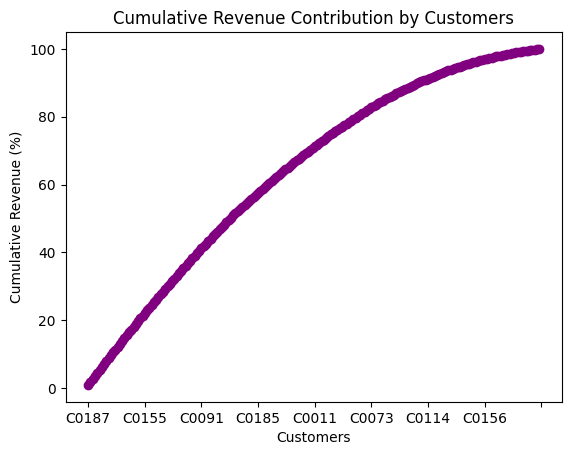

(np.int64(9786), np.int64(111896))

In [11]:
# Ranking customers by total revenue
df_customer_revenue = df.groupby('CustomerID')['Revenue'].sum()
df_customer_revenue = df_customer_revenue.sort_values(ascending=False)

# Identifying the top 5% of customers
top_5_percent_customers = df_customer_revenue.head(int(len(df_customer_revenue) * 0.05))

# Calculating the revenue contributed by top 5% customers
top_5_percent_revenue = top_5_percent_customers.sum()

# Calculating the total revenue
total_revenue = df_customer_revenue.sum()

# Ploting the cumulative revenue contribution
cumulative_revenue = df_customer_revenue.cumsum() / total_revenue * 100
cumulative_revenue.plot(kind='line', color='purple', marker='o')
plt.title('Cumulative Revenue Contribution by Customers')
plt.xlabel('Customers')
plt.ylabel('Cumulative Revenue (%)')
plt.show()

top_5_percent_revenue, total_revenue


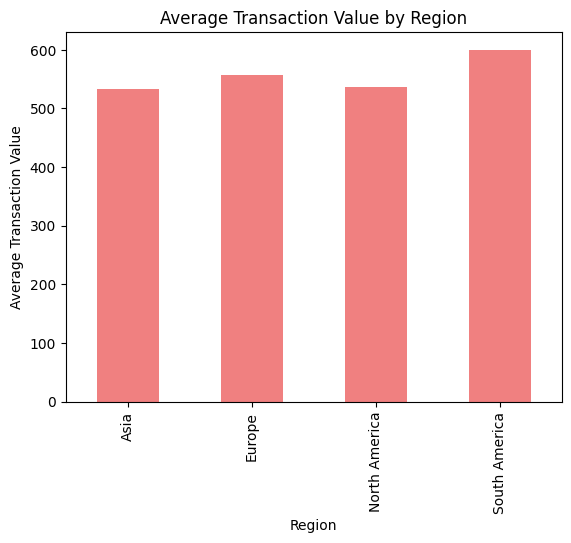

Region
Asia             532.400000
Europe           556.920000
North America    536.630435
South America    600.118644
Name: Revenue, dtype: float64

In [12]:
# Calculating average transaction value per region
region_avg_value = df.groupby('Region')['Revenue'].mean()

# Ploting the bar chart for average transaction value by region
region_avg_value.plot(kind='bar', color='lightcoral')
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value')
plt.show()

region_avg_value


In [27]:
import matplotlib.pyplot as plt
plt.savefig('Average_Transaction_Value_by_Region.png')

<Figure size 640x480 with 0 Axes>